In [1]:
#Module 5 project - Sentiment analysis of news companies twitter feed -BBC, CNN, CNBC, Bloomberg and FOX

In [2]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob

In [3]:
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [4]:
# We import our access keys:
#from credentials import *    # This will allow us to use the keys as variables
keys = get_keys("/Users/eyambaita/.secret/api.json")

In [5]:
CONSUMER_KEY = keys['CONSUMER_KEY']
CONSUMER_SECRET = keys['CONSUMER_SECRET']
ACCESS_TOKEN = keys['ACCESS_TOKEN']
ACCESS_SECRET = keys['ACCESS_SECRET']

In [6]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [7]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="@BBCWorld", count=200)
tweets1 = extractor.user_timeline(screen_name="@CNN", count=200)
tweets2 = extractor.user_timeline(screen_name="@CNBC", count=200)
tweets3 = extractor.user_timeline(screen_name="@business", count=200)
tweets4 = extractor.user_timeline(screen_name="@FoxNews", count=200)
#print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
#print("5 recent tweets:\n")
for tweet in tweets[:5]:
    BBC=(tweet.text)
for tweet1 in tweets1[:5]:
    CNN=(tweet1.text)
for tweet2 in tweets2[:5]:
    CNBC=(tweet2.text)
for tweet3 in tweets3[:5]:
    BLOOM=(tweet3.text)
for tweet4 in tweets4[:5]:
    FOX=(tweet4.text)

In [8]:
data=pd.DataFrame(data=[tweet.text for tweet in tweets],columns =['BBC'])
data1 = pd.DataFrame(data=[tweet1.text for tweet1 in tweets1], columns=['CNN'])
data2 = pd.DataFrame(data=[tweet2.text for tweet2 in tweets2], columns=['CNBC'])
data3 = pd.DataFrame(data=[tweet3.text for tweet3 in tweets3], columns=['BLOOM'])
data4 = pd.DataFrame(data=[tweet4.text for tweet4 in tweets4], columns=['FOX'])
# We display the first 10 elements of the dataframe:
main_data_untouched =pd.concat([data, data1, data2, data3, data4], axis=1, join='outer', sort=True)
main_data = main_data_untouched.copy()
main_data.head(3)

,BBC,CNN,CNBC,BLOOM,FOX
0,Iraq protests: Fresh clashes leave five people...,These women are all in senior positions on Dem...,This is billionaire Jeff Bezos' daily routine ...,These are the best (and worst) pension systems...,BREAKING: Federal appeals court rules against ...
1,India yoga: Inspirational teacher V Nanammal d...,The House Committee on Ethics announced it is ...,"U.S. families waste $1,500 a year throwing out...","Facebook wants to get into banking, but bankin...",Breaking News: Grand jury indicts captain of M...
2,"RT @BBCBreaking: Maurice Robinson, 25, charged...",A convoy of about 18 US military vehicles depa...,Alibaba's Jack Ma spent 10 years preparing for...,Authorities have seized luxury cars and expens...,JUST IN: Police identify gunman who opened fir...


In [9]:
main_data_untouched.head(3)

,BBC,CNN,CNBC,BLOOM,FOX
0,Iraq protests: Fresh clashes leave five people...,These women are all in senior positions on Dem...,This is billionaire Jeff Bezos' daily routine ...,These are the best (and worst) pension systems...,BREAKING: Federal appeals court rules against ...
1,India yoga: Inspirational teacher V Nanammal d...,The House Committee on Ethics announced it is ...,"U.S. families waste $1,500 a year throwing out...","Facebook wants to get into banking, but bankin...",Breaking News: Grand jury indicts captain of M...
2,"RT @BBCBreaking: Maurice Robinson, 25, charged...",A convoy of about 18 US military vehicles depa...,Alibaba's Jack Ma spent 10 years preparing for...,Authorities have seized luxury cars and expens...,JUST IN: Police identify gunman who opened fir...


In [10]:
#Lowercasing
main_data['BBC'] = main_data['BBC'].apply(lambda x: " ".join(x.lower() for x in x.split()))
main_data['CNN'] = main_data['CNN'].apply(lambda x: " ".join(x.lower() for x in x.split()))
main_data['CNBC'] = main_data['CNBC'].apply(lambda x: " ".join(x.lower() for x in x.split()))
main_data['BLOOM'] = main_data['BLOOM'].apply(lambda x: " ".join(x.lower() for x in x.split()))
main_data['FOX'] = main_data['FOX'].apply(lambda x: " ".join(x.lower() for x in x.split()))
main_data.head(2)

,BBC,CNN,CNBC,BLOOM,FOX
0,iraq protests: fresh clashes leave five people...,these women are all in senior positions on dem...,this is billionaire jeff bezos' daily routine ...,these are the best (and worst) pension systems...,breaking: federal appeals court rules against ...
1,india yoga: inspirational teacher v nanammal d...,the house committee on ethics announced it is ...,"u.s. families waste $1,500 a year throwing out...","facebook wants to get into banking, but bankin...",breaking news: grand jury indicts captain of m...


In [11]:
## remove punctuation
main_data['BBC'] = main_data['BBC'].str.replace('[@]','')
main_data['CNN'] = main_data['CNN'].str.replace('[@]','')
main_data['CNBC'] = main_data['CNBC'].str.replace('[@]','')
main_data['BLOOM'] = main_data['BLOOM'].str.replace('[@]','')
main_data['FOX'] = main_data['FOX'].str.replace('[@]','')
main_data.head(2)

,BBC,CNN,CNBC,BLOOM,FOX
0,iraq protests: fresh clashes leave five people...,these women are all in senior positions on dem...,this is billionaire jeff bezos' daily routine ...,these are the best (and worst) pension systems...,breaking: federal appeals court rules against ...
1,india yoga: inspirational teacher v nanammal d...,the house committee on ethics announced it is ...,"u.s. families waste $1,500 a year throwing out...","facebook wants to get into banking, but bankin...",breaking news: grand jury indicts captain of m...


In [12]:
#remove stopwords
stop = stopwords.words('english')
main_data['BBC'] = main_data['BBC'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_data['CNN'] = main_data['CNN'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_data['CNBC'] = main_data['CNBC'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_data['BLOOM'] = main_data['BLOOM'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_data['FOX'] = main_data['FOX'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_data.head(2)

,BBC,CNN,CNBC,BLOOM,FOX
0,iraq protests: fresh clashes leave five people...,women senior positions democratic presidential...,billionaire jeff bezos' daily routine sets suc...,best (and worst) pension systems world https:/...,breaking: federal appeals court rules trump ad...
1,india yoga: inspirational teacher v nanammal d...,house committee ethics announced opening inves...,"u.s. families waste $1,500 year throwing food ...","facebook wants get banking, banking may want l...",breaking news: grand jury indicts captain miss...


In [13]:
#Stemming
st = PorterStemmer()
main_data['BBC'] = main_data['BBC'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
main_data['CNN'] = main_data['CNN'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
main_data['CNBC'] = main_data['CNBC'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
main_data['BLOOM'] = main_data['BLOOM'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
main_data['FOX'] = main_data['FOX'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
main_data.head(2)

,BBC,CNN,CNBC,BLOOM,FOX
0,iraq protests: fresh clash leav five peopl dea...,women senior posit democrat presidenti campaig...,billionair jeff bezos' daili routin set succes...,best (and worst) pension system world https://...,breaking: feder appeal court rule trump admini...
1,india yoga: inspir teacher v nanamm die 99 htt...,hous committe ethic announc open investig alle...,"u.s. famili wast $1,500 year throw food — here...","facebook want get banking, bank may want let f...",break news: grand juri indict captain missouri...


In [14]:
def senti(x):
    return (TextBlob(x).sentiment.polarity)  
###############################################
#Used function below instead

def analyze_sentiment(x):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(x)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [15]:
#As it can be observed there are two scores: 
#the first score is sentiment polarity which tells if the sentiment is positive or negative and 
#the second score is subjectivity score to tell how subjective is the text.
#The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [16]:
#main_data['senti_score_BBC'] = main_data['BBC'].apply(analyze_sentiment)
#main_data['senti_score_CNN'] = main_data['CNN'].apply(analyze_sentiment)
#main_data['senti_score_CNBC'] = main_data['CNBC'].apply(analyze_sentiment)
#main_data['senti_score_BLOOM'] = main_data['BLOOM'].apply(analyze_sentiment)
#main_data['senti_score_FOX'] = main_data['FOX'].apply(analyze_sentiment)
main_data['senti_score_BBC'] = main_data['BBC'].apply(senti)
main_data['senti_score_CNN'] = main_data['CNN'].apply(senti)
main_data['senti_score_CNBC'] = main_data['CNBC'].apply(senti)
main_data['senti_score_BLOOM'] = main_data['BLOOM'].apply(senti)
main_data['senti_score_FOX'] = main_data['FOX'].apply(senti)
main_data.head(2)

,BBC,CNN,CNBC,BLOOM,FOX,senti_score_BBC,senti_score_CNN,senti_score_CNBC,senti_score_BLOOM,senti_score_FOX
0,iraq protests: fresh clash leav five peopl dea...,women senior posit democrat presidenti campaig...,billionair jeff bezos' daili routin set succes...,best (and worst) pension system world https://...,breaking: feder appeal court rule trump admini...,0.05,0.0,0.3,0.0,0.0
1,india yoga: inspir teacher v nanamm die 99 htt...,hous committe ethic announc open investig alle...,"u.s. famili wast $1,500 year throw food — here...","facebook want get banking, bank may want let f...",break news: grand juri indict captain missouri...,0.00,0.0,0.0,0.0,0.5


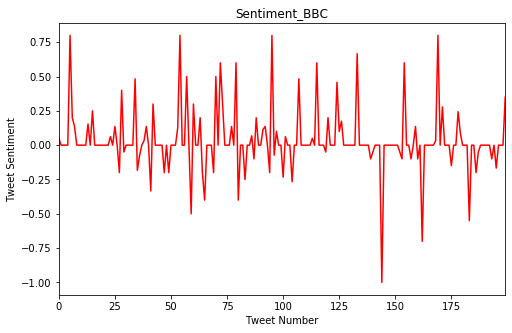

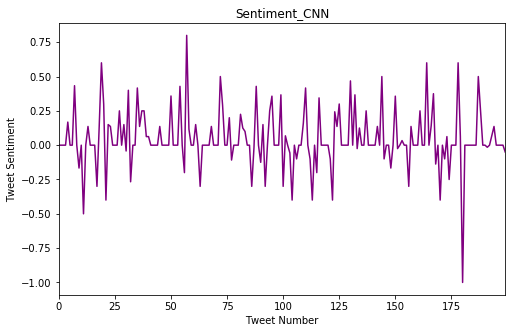

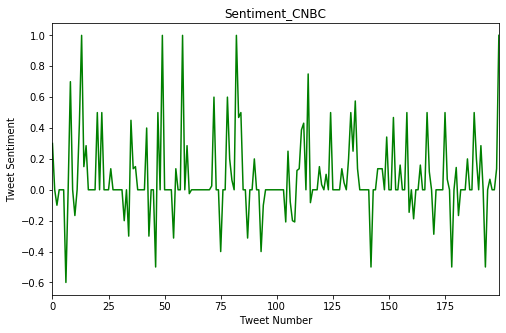

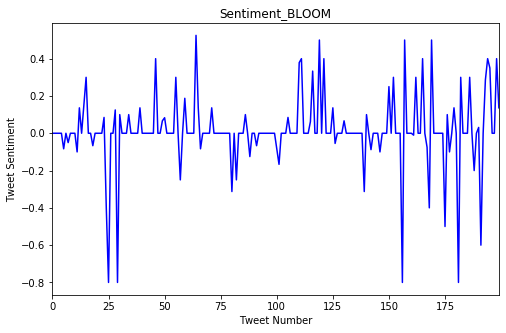

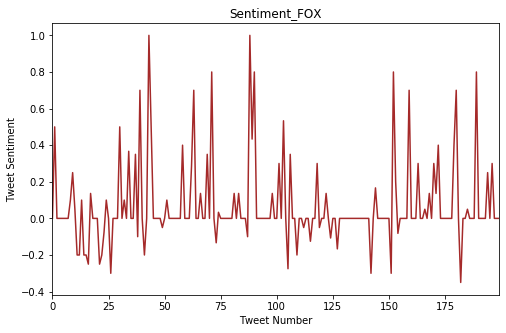

In [17]:
#Visualization
#main_data.senti_score_BBC.plot()

#fig = plt.figure()
plt.figure(figsize=(8,5))
ax = main_data.senti_score_BBC.plot(color='red')
ax.set_figsize=(15,140)
ax.set_xlabel('Tweet Number')
ax.set_ylabel('Tweet Sentiment')
ax.set_title('Sentiment_BBC')
plt.show()

plt.figure(figsize=(8,5))
bx = main_data.senti_score_CNN.plot(color='purple')
bx.set_figsize=(15,140)
bx.set_xlabel('Tweet Number')
bx.set_ylabel('Tweet Sentiment')
bx.set_title('Sentiment_CNN')
bx.set_figsize=(15,140)
#plt.figsize=(15,40)
plt.show()

plt.figure(figsize=(8,5))
cx = main_data.senti_score_CNBC.plot(color='green')
cx.set_figsize=(15,140)
cx.set_xlabel('Tweet Number')
cx.set_ylabel('Tweet Sentiment')
cx.set_title('Sentiment_CNBC')
cx.set_figsize=(15,140)
#plt.figsize=(15,40)
plt.show()

plt.figure(figsize=(8,5))
dx = main_data.senti_score_BLOOM.plot(color='blue')
dx.set_figsize=(15,140)
dx.set_xlabel('Tweet Number')
dx.set_ylabel('Tweet Sentiment')
dx.set_title('Sentiment_BLOOM')
dx.set_figsize=(15,140)
#plt.figsize=(15,40)
plt.show()

plt.figure(figsize=(8,5))
ex = main_data.senti_score_FOX.plot(color='brown')
ex.set_figsize=(15,140)
ex.set_xlabel('Tweet Number')
ex.set_ylabel('Tweet Sentiment')
ex.set_title('Sentiment_FOX')
ex.set_figsize=(15,140)
#plt.figsize=(15,40)
plt.show()

#from matplotlib import pyplot as plt
#plt.figure(figsize=(1,1))
#x = [1,2,3]
#plt.plot(x, x)
#plt.show()


In [18]:
main_data=main_data[['BBC','senti_score_BBC','CNN','senti_score_CNN','CNBC','senti_score_CNBC','BLOOM','senti_score_BLOOM','FOX','senti_score_FOX']]

In [19]:
main_data.head(2)

,BBC,senti_score_BBC,CNN,senti_score_CNN,CNBC,senti_score_CNBC,BLOOM,senti_score_BLOOM,FOX,senti_score_FOX
0,iraq protests: fresh clash leav five peopl dea...,0.05,women senior posit democrat presidenti campaig...,0.0,billionair jeff bezos' daili routin set succes...,0.3,best (and worst) pension system world https://...,0.0,breaking: feder appeal court rule trump admini...,0.0
1,india yoga: inspir teacher v nanamm die 99 htt...,0.00,hous committe ethic announc open investig alle...,0.0,"u.s. famili wast $1,500 year throw food — here...",0.0,"facebook want get banking, bank may want let f...",0.0,break news: grand juri indict captain missouri...,0.5


In [20]:
#main_data.loc[main_data['senti_score_BBC'].idxmax()]
#print(main_data[['BBC']][main_data.senti_score_BBC == main_data.senti_score_BBC.max()])
hold = (main_data[['BBC']][main_data.senti_score_BBC == main_data.senti_score_BBC.max()])
hold1 = (main_data[['CNN']][main_data.senti_score_CNN == main_data.senti_score_CNN.max()])
hold2 = (main_data[['CNBC']][main_data.senti_score_CNBC == main_data.senti_score_CNBC.max()])
hold3 = (main_data[['BLOOM']][main_data.senti_score_BLOOM == main_data.senti_score_BLOOM.max()])
hold4 = (main_data[['FOX']][main_data.senti_score_FOX == main_data.senti_score_FOX.max()])
BBC_index = hold.index
CNN_index = hold1.index
CNBC_index = hold2.index
BLOOM_index = hold3.index
FOX_index = hold4.index
print(BBC_index)

Int64Index([5, 54, 95, 169], dtype='int64')


In [21]:
main_data_untouched.head(3)

,BBC,CNN,CNBC,BLOOM,FOX
0,Iraq protests: Fresh clashes leave five people...,These women are all in senior positions on Dem...,This is billionaire Jeff Bezos' daily routine ...,These are the best (and worst) pension systems...,BREAKING: Federal appeals court rules against ...
1,India yoga: Inspirational teacher V Nanammal d...,The House Committee on Ethics announced it is ...,"U.S. families waste $1,500 a year throwing out...","Facebook wants to get into banking, but bankin...",Breaking News: Grand jury indicts captain of M...
2,"RT @BBCBreaking: Maurice Robinson, 25, charged...",A convoy of about 18 US military vehicles depa...,Alibaba's Jack Ma spent 10 years preparing for...,Authorities have seized luxury cars and expens...,JUST IN: Police identify gunman who opened fir...


In [22]:
main_data_untouched.head(3)

,BBC,CNN,CNBC,BLOOM,FOX
0,Iraq protests: Fresh clashes leave five people...,These women are all in senior positions on Dem...,This is billionaire Jeff Bezos' daily routine ...,These are the best (and worst) pension systems...,BREAKING: Federal appeals court rules against ...
1,India yoga: Inspirational teacher V Nanammal d...,The House Committee on Ethics announced it is ...,"U.S. families waste $1,500 a year throwing out...","Facebook wants to get into banking, but bankin...",Breaking News: Grand jury indicts captain of M...
2,"RT @BBCBreaking: Maurice Robinson, 25, charged...",A convoy of about 18 US military vehicles depa...,Alibaba's Jack Ma spent 10 years preparing for...,Authorities have seized luxury cars and expens...,JUST IN: Police identify gunman who opened fir...


In [23]:
Recommend_BBC = main_data_untouched.loc[BBC_index,'BBC']
print(Recommend_BBC)

5      About one million people joined a "joyful and ...
54     US election 2020: Trump steals Biden's pitch t...
95     Protests intensify in Bolivia as President Evo...
169    House Rules: 'Bullied' reality TV star wins pa...
Name: BBC, dtype: object


In [24]:
Recommend_CNN = main_data_untouched.loc[CNN_index,'CNN']
print(Recommend_CNN)

57    "With the death of Elijah Cummings, the United...
Name: CNN, dtype: object


In [25]:
Recommend_CNBC = main_data_untouched.loc[CNBC_index,'CNBC']
print(Recommend_CNBC)

13     These are the 10 best universities in the worl...
49     Here are the best calls of the week on Wall St...
58     These are the 10 best universities in the worl...
82     This is the best answer I ever received to the...
199    Intel CEO, as shares soar, talks about how to ...
Name: CNBC, dtype: object


In [26]:
Recommend_BLOOM = main_data_untouched.loc[BLOOM_index,'BLOOM']
print(Recommend_BLOOM)

64    The House impeachment inquiry lurched into hig...
Name: BLOOM, dtype: object


In [27]:
Recommend_FOX = main_data_untouched.loc[FOX_index,'FOX']
print(Recommend_FOX)

43    .@TuckerCarlson: "Supporting marriage and chil...
88    .@TuckerCarlson: "Supporting marriage and chil...
Name: FOX, dtype: object


In [28]:
print("Hello! My name is Jarvis, your news fetcher.")
print("Would you like me to fetch your news?")

Hello! My name is Jarvis, your news fetcher.
Would you like me to fetch your news?


In [29]:
x =input("yes or no")

yes or noyes


In [30]:
if x == 'yes':
    print("OK great, do you have a preferred news channel?")
    y = input("CNN or BLOOM or FOX or CNBC or BBC ")
else:
    print("Alright, have a good day, bye!")
    y = 'stop'

OK great, do you have a preferred news channel?
CNN or BLOOM or FOX or CNBC or BBC FOX


In [31]:
if y == 'BBC':
    print("Do you have a preference for the most positive news or are you indifferent?")
    y2 = input("positive or indifferent ")
elif y == 'CNN':
    print("Do you have a preference for the most positive news or are you indifferent?")
    y2 = input("positive or indifferent ")
elif y == 'CNBC':
    print("Do you have a preference for the most positive news or are you indifferent?")
    y2 = input("positive or indifferent ")
elif y == 'FOX':
    print("Do you have a preference for the most positive news or are you indifferent?")
    y2 = input("positive or indifferent ")
elif y == 'BLOOM':
    print("Do you have a preference for the most positive news or are you indifferent?")
    y2 = input("positive or indifferent ")
elif y == 'stop':
    y2 = 'stop'
else:
    print("I currently dont cover this news channel. Sorry and have a good day, bye!")

Do you have a preference for the most positive news or are you indifferent?
positive or indifferent positive


In [32]:
if y == 'BBC' and y2 == 'positive':
    print (Recommend_BBC)
elif y == 'BBC' and y2 == 'indifferent':
    print(main_data_untouched['BBC'].head(3))
elif y == 'CNN' and y2 == 'positive':
    print (Recommend_CNN)
elif y == 'CNN' and y2 == 'indifferent':
    print (main_data_untouched['CNN'].head(3))
elif y == 'CNBC' and y2 == 'positive':
    print(Recommend_CNBC)
elif y == 'CNBC' and y2 == 'indifferent':
    print(main_data_untouched['CNBC'].head(3))
elif y == 'FOX' and y2 == 'positive':
    print (Recommend_FOX)
elif y == 'FOX' and y2 == 'indifferent':
    print(main_data_untouched['FOX'].head(3))
elif y == 'BLOOM' and y2 == 'positive':
    print (Recommend_BLOOM)
elif y == 'BLOOM' and y2 == 'indifferent':
    print(main_data_untouched['BLOOM'].head(3))
elif y == 'stop' and y2 == 'stop':
    print("I am happy to help you fetch your news when you are ready. Bye!")
else:
    print("I dont understand your inputs, please retry again.Have a good day, bye!")

43    .@TuckerCarlson: "Supporting marriage and chil...
88    .@TuckerCarlson: "Supporting marriage and chil...
Name: FOX, dtype: object


In [33]:
print(y)

FOX


In [34]:
print(y2)

positive
